In [7]:
import numpy as np
from skimage import data 
from skimage import color
from skimage import filters
from skimage import feature
import matplotlib.pyplot as plt
from skimage.morphology import rectangle
from scipy.signal import convolve2d
from skimage import data
from skimage.feature import match_template
from skimage.feature import peak_local_max

# LOAD IMAGE DATA
image = data.coins()
# Select an interesting area for creating a templat
template = image[170:220, 75:130]

262144
(512, 512)


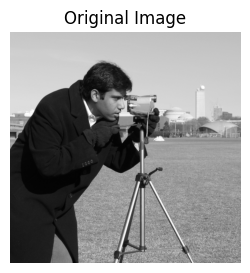

262144
(512, 512)


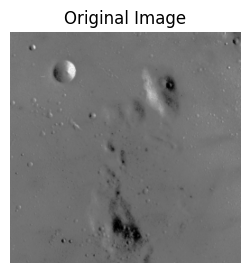

116352
(303, 384)


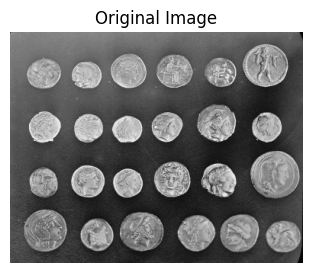

In [9]:
# Load an image from SKIMAGE of scikit-image
image_cam = data.camera() # read the image
print(image_cam.size)  # Array image size
print(image_cam.shape) # Width and Height of image


# display the image
plt.figure(figsize=(10,3))
plt.imshow(image_cam, cmap='gray') # display the image
plt.title('Original Image')
plt.axis('off')
plt.show()

# Load an image from SKIMAGE of scikit-image
image_moon = data.moon() # read the image
print(image_moon.size)  # Array image size
print(image_moon.shape) # Width and Height of image

plt.figure(figsize=(10,3))
plt.imshow(image_moon, cmap='gray') # display the image
plt.title('Original Image')
plt.axis('off')
plt.show()

# image_coin = data.coins()
image_coin = data.coins()
print(image_coin.size)  # Array image size
print(image_coin.shape) # Width and Height of image

plt.figure(figsize=(10,3))
plt.imshow(image_coin, cmap='gray') # display the image
plt.title('Original Image')
plt.axis('off')
plt.show()

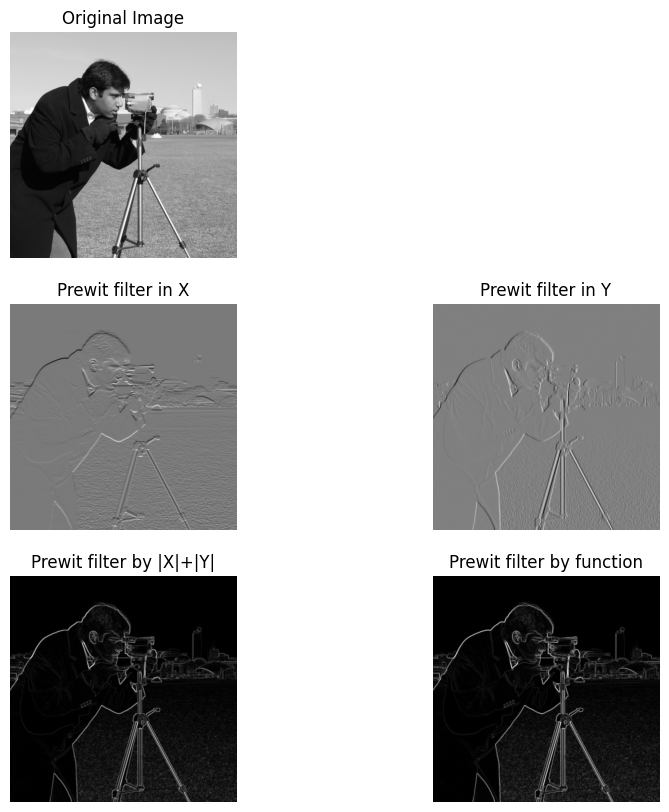

In [10]:
image_prewit_x = filters.prewitt_h(image_cam)
image_prewit_y = filters.prewitt_v(image_cam)
image_prewit = filters.prewitt(image_cam)


# display the image
plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
plt.imshow(image_cam, cmap='gray') # display the image
plt.title('Original Image')
plt.axis('off')

plt.subplot(3,2,3)
plt.imshow(image_prewit_x, cmap='gray') # display the image
plt.title('Prewit filter in X')
plt.axis('off')

plt.subplot(3,2,4)
plt.imshow(image_prewit_y, cmap='gray') # display the image
plt.title('Prewit filter in Y')
plt.axis('off')


image_prewit_xy = np.absolute(image_prewit_x) + np.absolute(image_prewit_y)
# image_prewit_xy = np.sqrt(image_prewit_x*image_prewit_x + image_prewit_y*image_prewit_x)

plt.subplot(3,2,5)
plt.imshow(image_prewit_xy, cmap='gray') # display the image
plt.title('Prewit filter by |X|+|Y|')
plt.axis('off')

plt.subplot(3,2,6)
plt.imshow(image_prewit, cmap='gray') # display the image
plt.title('Prewit filter by function')
plt.axis('off')


plt.show()

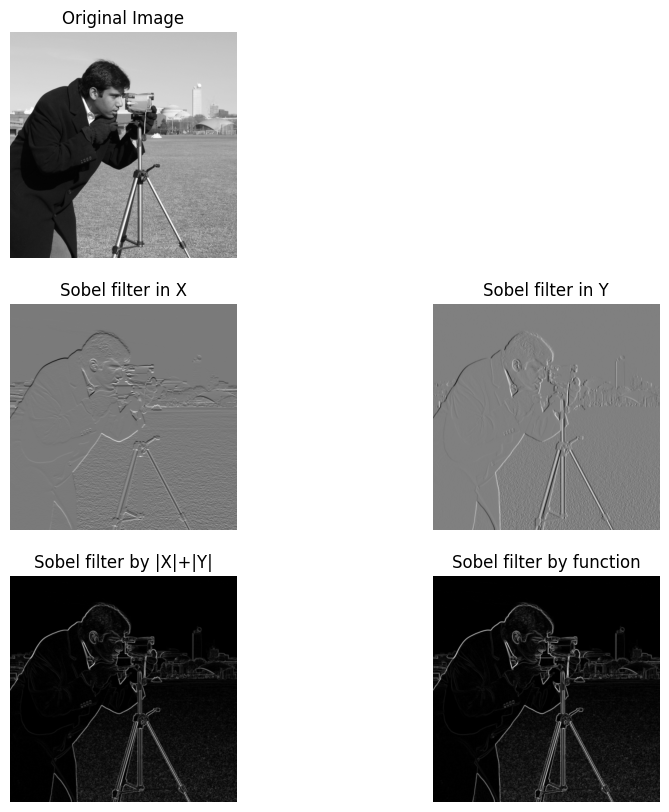

In [11]:
image_sobel_x = filters.sobel_h(image_cam)
image_sobel_y = filters.sobel_v(image_cam)
image_sobel = filters.sobel(image_cam)


# display the image
plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
plt.imshow(image_cam, cmap='gray') # display the image
plt.title('Original Image')
plt.axis('off')

plt.subplot(3,2,3)
plt.imshow(image_sobel_x, cmap='gray') # display the image
plt.title('Sobel filter in X')
plt.axis('off')

plt.subplot(3,2,4)
plt.imshow(image_sobel_y, cmap='gray') # display the image
plt.title('Sobel filter in Y')
plt.axis('off')


image_sobel_xy = np.absolute(image_sobel_x) + np.absolute(image_sobel_y)

plt.subplot(3,2,5)
plt.imshow(image_sobel_xy, cmap='gray') # display the image
plt.title('Sobel filter by |X|+|Y|')
plt.axis('off')

plt.subplot(3,2,6)
plt.imshow(image_sobel, cmap='gray') # display the image
plt.title('Sobel filter by function')
plt.axis('off')


plt.show()

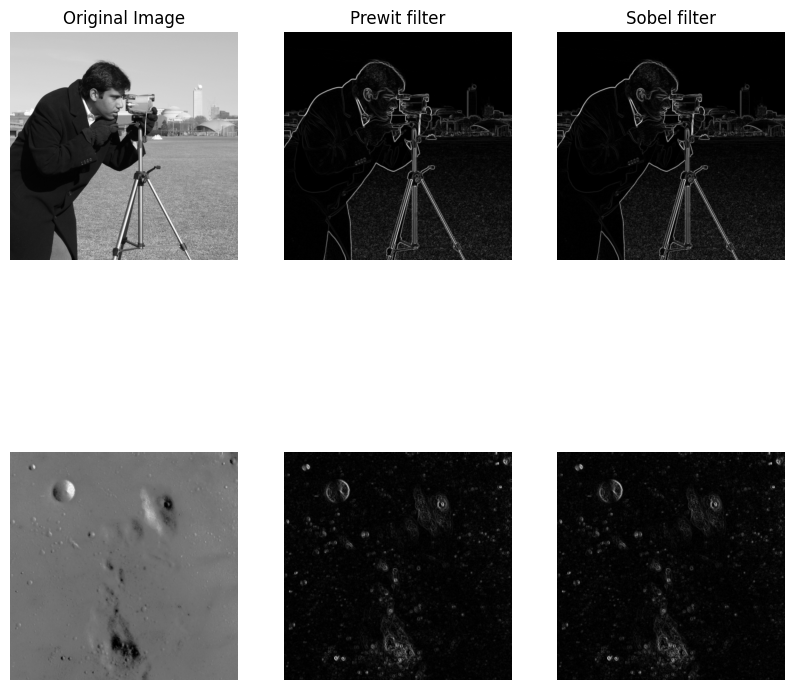

In [12]:
image_prewit = filters.prewitt(image_cam)
image_sobel = filters.sobel(image_cam)

# display the image
plt.figure(figsize=(10,10))

plt.subplot(2,3,1)
plt.imshow(image_cam, cmap='gray') # display the image
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(image_prewit, cmap='gray') # display the image
plt.title('Prewit filter')
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(image_sobel, cmap='gray') # display the image
plt.title('Sobel filter')
plt.axis('off')

#========== IMAGE 2
image_prewit = filters.prewitt(image_moon)
image_sobel = filters.sobel(image_moon)


plt.subplot(2,3,4)
plt.imshow(image_moon, cmap='gray') # display the image
# plt.title('Original Image')
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(image_prewit, cmap='gray') # display the image
# plt.title('Prewit filter')
plt.axis('off')

plt.subplot(2,3,6)
plt.imshow(image_sobel, cmap='gray') # display the image
# plt.title('Sobel filter')
plt.axis('off')

plt.show()

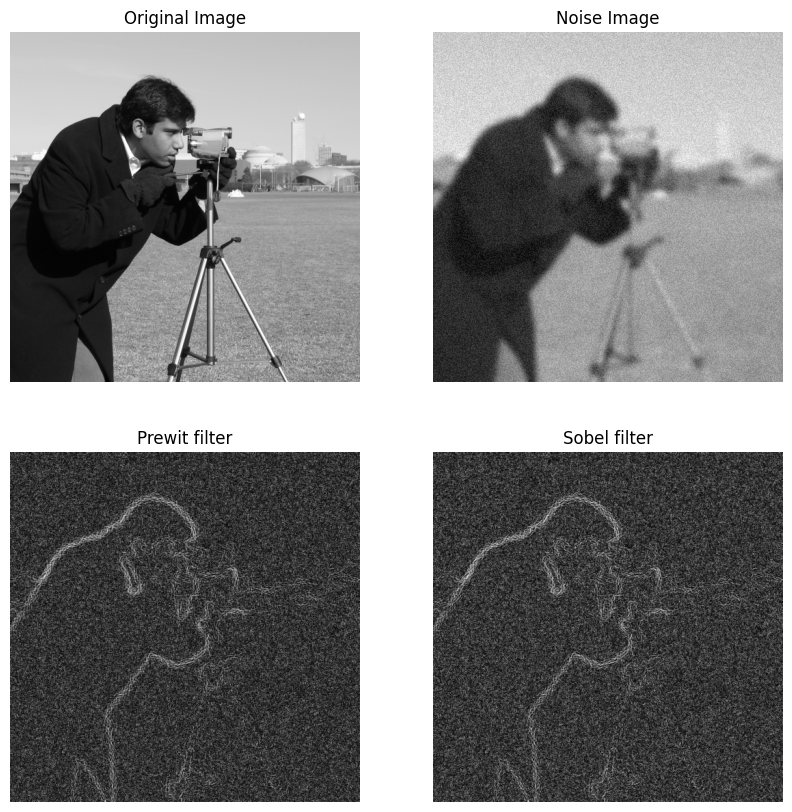

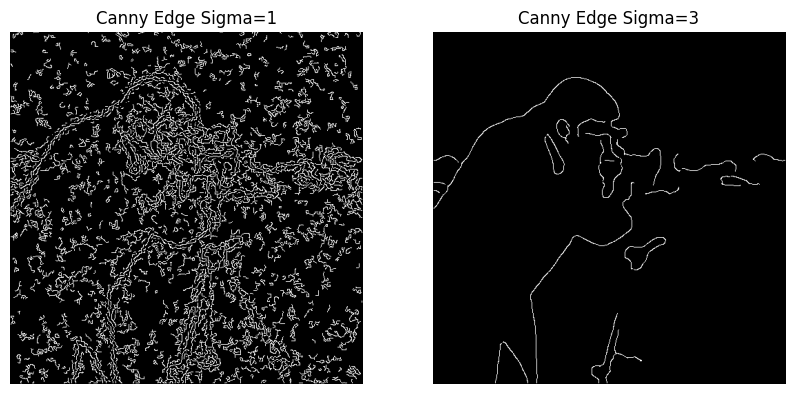

In [13]:
image_cam_noise = image_cam.copy()
image_cam_noise = filters.gaussian(image_cam_noise, 4)
image_cam_noise += 0.2 * np.random.random(image_cam.shape)

image_prewit = filters.prewitt(image_cam)
image_sobel = filters.sobel(image_cam)

# display the image
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.imshow(image_cam, cmap='gray') # display the image
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(image_cam_noise, cmap='gray') # display the image
plt.title('Noise Image')
plt.axis('off')

image_prewit = filters.prewitt(image_cam_noise)
image_sobel = filters.sobel(image_cam_noise)

plt.subplot(2,2,3)
plt.imshow(image_prewit, cmap='gray') # display the image
plt.title('Prewit filter')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(image_sobel, cmap='gray') # display the image
plt.title('Sobel filter')
plt.axis('off')

plt.show()

edges1 = feature.canny(image_cam_noise, sigma=1)
edges2 = feature.canny(image_cam_noise, sigma=3)

# display the image
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.imshow(edges1, cmap='gray') # display the image
plt.title('Canny Edge Sigma=1')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(edges2, cmap='gray') # display the image
plt.title('Canny Edge Sigma=3')
plt.axis('off')

plt.show()

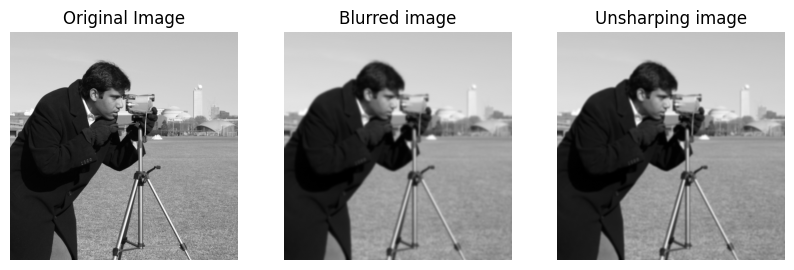

In [14]:
# Blur image
image_cam_noise = image_cam.copy()
image_cam_noise = filters.gaussian(image_cam_noise, 2)

mask_avg = [[0, 1, 0],
           [1, -4, 1],
           [0, 1, 0]]
image_laplacian = convolve2d(image_cam_noise, mask_avg, mode="same", boundary="symm")

# display the image
plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.imshow(image_cam, cmap='gray') # display the image
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(image_cam_noise, cmap='gray') # display the image
plt.title('Blurred image')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(image_cam_noise - image_laplacian, cmap='gray') # display the image
plt.title('Unsharping image')
plt.axis('off')

plt.show()

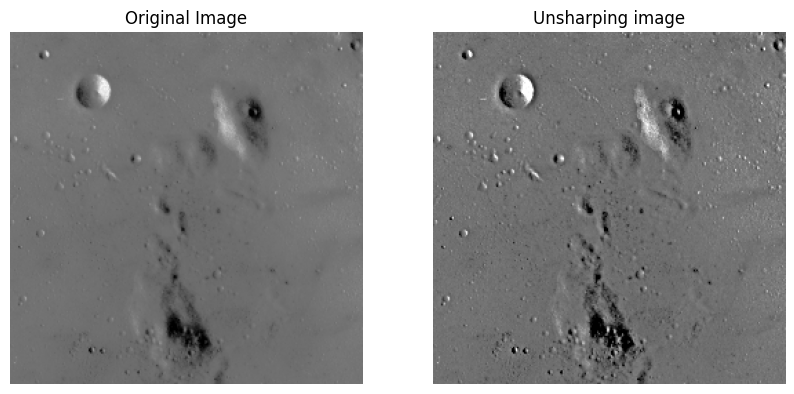

In [15]:
# enhanced image = original + amount * (original - blurred)
image_unsharp = filters.unsharp_mask(image_moon, radius=5, amount=2)

# display the image
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.imshow(image_moon, cmap='gray') # display the image
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(image_unsharp, cmap='gray') # display the image
plt.title('Unsharping image')
plt.axis('off')

plt.show()

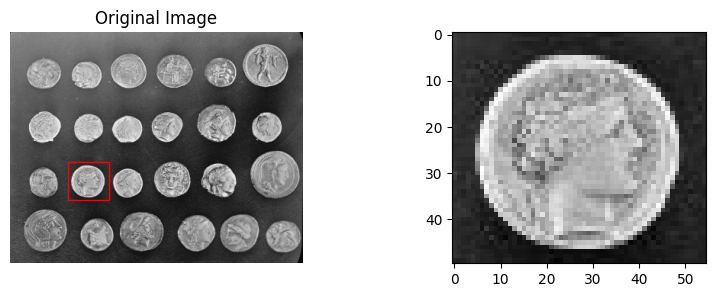

In [16]:
# imX, imY = image_coin.shape

# Define the interesting are of a coin 
coin = image_coin[170:220, 75:130]
hcoin, wcoin = coin.shape

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.imshow(image_coin, cmap='gray') # display the image

# Display the interesing area
plt.gca().add_patch(
                plt.Rectangle((75, 170), 
                              wcoin, hcoin, 
                              edgecolor='r', 
                              facecolor='none')
                )
plt.title('Original Image')
plt.axis('off')


plt.subplot(1,2,2)
plt.imshow(coin, cmap='gray')
plt.show()

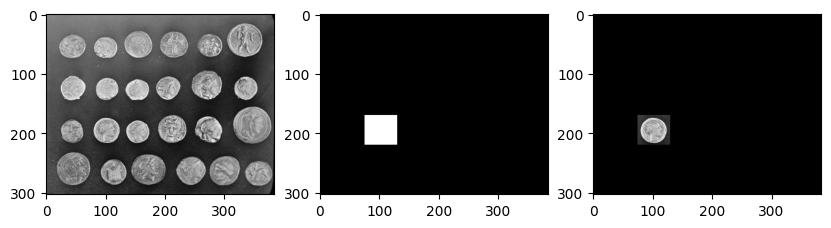

In [17]:
# AND OPERATION
# Create masking image
horg, worg = image_coin.shape
image_mask = np.zeros((horg, worg), dtype = "uint8")

# ?
image_mask[170:220, 75:130] = 255

plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.imshow(image_coin, cmap='gray') # display the image
plt.subplot(1,3,2)
plt.imshow(image_mask, cmap='gray') # display the image
plt.subplot(1,3,3) #?
plt.imshow(image_coin & image_mask, cmap='gray') # display the image

plt.show()

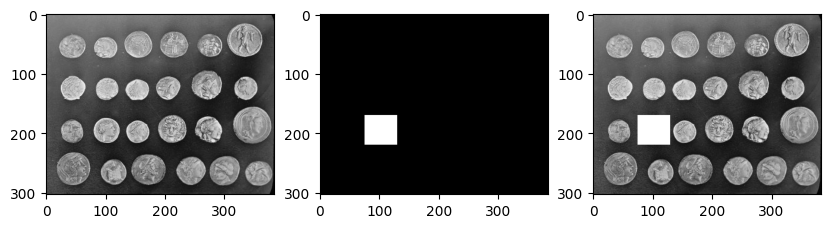

In [18]:
# OR OPERATION
# Create masking image
horg, worg = image_coin.shape
image_mask = np.zeros((horg, worg), dtype = "uint8")
# ?
image_mask[170:220, 75:130] = 255

plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.imshow(image_coin, cmap='gray') # display the image
plt.subplot(1,3,2)
plt.imshow(image_mask, cmap='gray') # display the image
plt.subplot(1,3,3) #?
plt.imshow(image_coin | image_mask, cmap='gray') # display the image

plt.show()